<a href="https://colab.research.google.com/github/JeanCarloBejaran/AI-apps/blob/main/Breed_Identifier_using_Python_and_Tensorflow_Hub's_inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Breed Identifier Powered by Machine Learning!





In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#tf.enable_eager_execution()
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
#lets deploy this using googlecollab to introduce people to friendly code for adding value in a fun way
#Hopefully, people can see from a high level what coding is and how a machine makes decisions.

# Import Inception_v3 Model Trained on IMAGENET

In [ ]:
IMAGE_RES = 299

MODEL_URL = 'https://tfhub.dev/google/tf2-preview/inception_v3/classification/4'

model_inception = tf.keras.Sequential([
 hub.KerasLayer(MODEL_URL, input_shape = (IMAGE_RES,IMAGE_RES,3),
                                         trainable = False)
])

model_inception.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


Import and Open the Pictures to Analyze.

In [ ]:
import os, os.path
import PIL.Image as Img

try:
  pics_path = '/Dog Pics Here!'
  os.mkdir(pics_path)

except:
  print("The Folder is Created; if you can't see it please go to the previous directory!")



The Folder is Created; if you can't see it please go to the previous directory!


In [ ]:
#How many pictures do we have?
Test_pictures = os.listdir(pics_path)
num_pics = len(Test_pictures) # number of pictures to analyze
num_pics

17

In [ ]:
#os.listdir(pics_path).remove('.ipynb_checkpoints')
Test_pictures[1]

'Coco13.jpg'

# <--- I need your human help here on the left! Could you please refresh the directory?


# Step 1: Click 'Files' and then 'Refresh' to show the "Dog Pics Here!"

Awesome! Now drop your puppies' best pictures into the "Dog Pics Here!"Folder by right clicking it and selecting upload.

In [ ]:
#needs renaming to come into effect.
#for pic in pics_path:

#pics_names = [pics_path + '/Coco' + str(i) +'.jpg' for i in range(num_pics)] #V1
pics_names = [Test_pictures[i] for i in range(num_pics)] #V2
pics_names.remove('.ipynb_checkpoints')
pics_names

['Coco5.jpg',
 'Coco13.jpg',
 'Ike1.jpg',
 'Coco11.jpg',
 'Coco8.jpg',
 'Coco1.jpg',
 'Coco10.jpeg',
 'Coco12.jpg.jpeg',
 'Coco6.jpg',
 'Coco3.jpg',
 'Coco4.jpg',
 'Coco0.jpg',
 'Coco9.jpg',
 'Coco7.jpg',
 'Ike0.jpg',
 'Coco2.jpg']

In [ ]:
Dog_pics = [Img.open('/Dog Pics Here!/' + pics_names[index -1]).resize((299,299)) for index in range(num_pics)]
Dog_pics

[<PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5853CF8>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5DCE940>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B57EE748>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B57EE7B8>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B57EEBE0>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B57EEFD0>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BC3080>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BC3BA8>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BD1C88>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BD4A20>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BCBD68>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BD4048>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5BD4390>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5811160>,
 <PIL.Image.Image image mode=RGB size=299x299 at 0x7F16B5811B38>,
 <PIL.Imag

In [ ]:
#Rename the uploaded pictures to something generic for dog or cat.

Let's take a look at the images we will show the inception model.

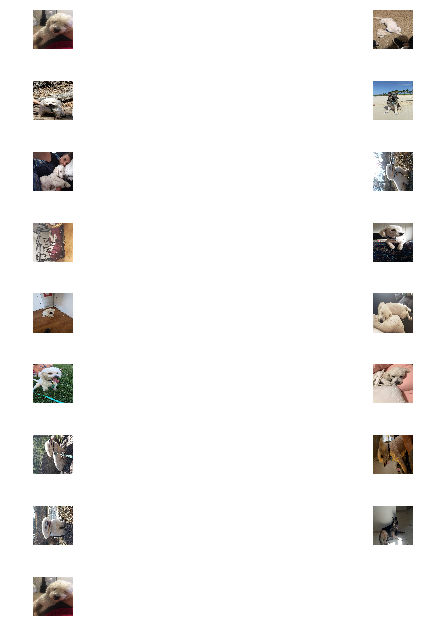

In [ ]:
num_rows = np.ceil(num_pics /2)

plt.figure(figsize=(12,9))
for n in range(num_pics):
  plt.subplot(num_rows,2,n+1)
  plt.subplots_adjust(hspace = 0.1)
  plt.imshow(Dog_pics[n])
  plt.tight_layout()
  plt.axis('off')

 **Double-Checking Data is in the format the inception model expects it!**


In [ ]:
Normalized_pics = [np.array(pic)/255 for pic in Dog_pics] #normalizing over 255 shades of gray
Normalized_pics

[array([[[0.46666667, 0.43529412, 0.39215686],
         [0.52941176, 0.49803922, 0.44705882],
         [0.5372549 , 0.50980392, 0.43921569],
         ...,
         [0.86666667, 0.84705882, 0.83137255],
         [0.8627451 , 0.84313725, 0.82745098],
         [0.8627451 , 0.84313725, 0.82745098]],
 
        [[0.48627451, 0.45490196, 0.41176471],
         [0.49411765, 0.4627451 , 0.41176471],
         [0.52941176, 0.50196078, 0.43137255],
         ...,
         [0.86666667, 0.84705882, 0.83137255],
         [0.8627451 , 0.84313725, 0.82745098],
         [0.8627451 , 0.84313725, 0.82745098]],
 
        [[0.50196078, 0.47058824, 0.42745098],
         [0.56078431, 0.52941176, 0.47843137],
         [0.55686275, 0.52941176, 0.45882353],
         ...,
         [0.86666667, 0.84705882, 0.83137255],
         [0.8627451 , 0.84313725, 0.82745098],
         [0.8627451 , 0.84313725, 0.82745098]],
 
        ...,
 
        [[0.43137255, 0.28627451, 0.21568627],
         [0.43137255, 0.28627451, 0.21568

In [ ]:
#Checking Image Shapes are three-dimensional tuples of (299,299,3)
list(map(lambda Normalized_pics: Normalized_pics.shape, Normalized_pics))

[(299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3)]

**ImageNet Labels stored in a numpy array**

In [ ]:
labels_path = tf.keras.utils.get_file('IMGNET_labels','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
IMGNET_labels = np.array(open(labels_path).read().splitlines())

**Visually-check all output shapes and predict**

In [ ]:
result = []
for pic_array in Coco: # what is coco?
  result.append(model_inception.predict(pic_array[np.newaxis]))
[result[i].shape for i in range(len(result))]

[(1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001),
 (1, 1001)]

In [ ]:
#squeezing all results to one 2d array.
result = tf.squeeze(result).numpy()
result.shape

#result = (result[0],result[1])
#result = pd.DataFrame(result)
#result

(17, 1001)

In [ ]:
import pandas as pd
top3 = pd.Series(np.argsort(result))[1000:997:-1]
top3

Exception: ignored

**Display predicted classes' index and names**

In [ ]:
#predicted_class = [np.argmax(prediction_array) for prediction_array in result] #create an image batch to stop the list comps. V1
#predicted_class = [np.argsort(prediction_array, axis = -1)[i][0:3] for i,prediction_array in enumerate(result)]
#predicted_ids = [np.argsort(predicted_batch, axis = -1)[i][0:3] for i,batch in enumerate(predicted_batch)] for choosing top 3 breed guesses in Coco's Breed Project.
#predicted_class

In [ ]:
predicted_class_name = [IMGNET_labels[pic] for pic in top3] #add percentage next to it as a confidence level
predicted_class_name

[array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle', 'miniature poodle', 'komondor'], dtype='<U30'),
 array(['toy poodle'

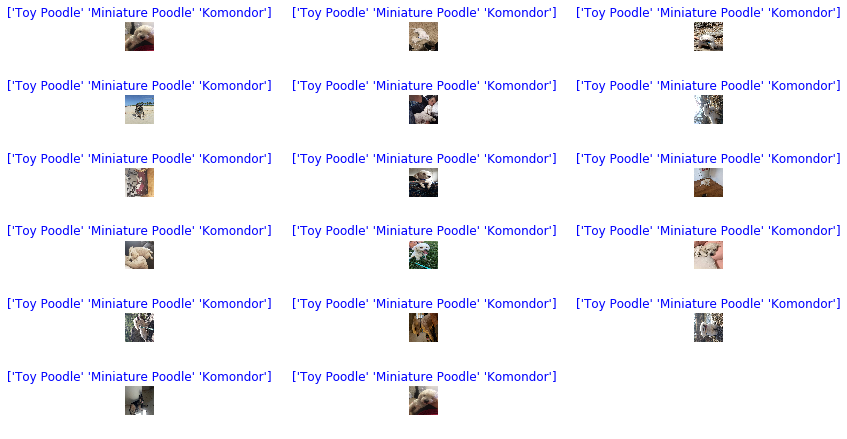

In [ ]:
plt.figure(figsize=(12,9))
for n in range(num_pics):
  plt.subplot(num_rows,3,n+1)
  plt.subplots_adjust(hspace = 0.1)
  plt.imshow(Coco_pics[n])
  plt.tight_layout()
  color = "blue"# if predicted_ids[n] == label_batch[n] else "red"
  plt.title(str(predicted_class_name[n]).title(), color = color)
  plt.axis('off')
#_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

**So after obtaining these results, how can the program make the best prediction? Take top 4 values for each prediction, add each as a vote and give the final top 3 probabilities based on all pics.**


In [ ]:
#Create Image Batch
''' do I need this?
image_batch = [str(image)+str(index) for index,image in enumerate('folder of images'range(10))]

image_batch

BATCH_SIZE = 10

'''

" do I need this?\nimage_batch = [str(image)+str(index) for index,image in enumerate('folder of images'range(10))]\n\nimage_batch\n\nBATCH_SIZE = 10\n\n"

In [ ]:
#Project Final:
#Two programs, 1. outputs the top 3 predictions along with their confidence level per pictures. (App Ready)
#2. Script to rename pictures in a folder depending on what dog it was.
#(apply transfer learning and add a last output layer to learn if it’s Ike, Coco or Scott)


In [ ]:
#alter code to make it output the top 3 classes using argsort's slice.
# now do it for a Batch of Images of Coco and see top 3 predictions for each photo
#Do it as an 'ensemble learning' method that adds all probabilities gotten for a final score of top 3 breeds.
#Leave above though as history of exploration, design an experiment to be conclusive with statistical significance from 30 pictures. Sdevs, pvalues? Knowing model is X% accurate?

In [ ]:
#To-Do:
#display top 3 predictions for this 1 pic.
#prepare a Coco pics image batch. Figure out how to make 1 prediction work for all batches
#Done-test with Ike and Scott.
#DOne-Deploy grid of photos and predictions in a flower-like manner

Mount your Drive and automate for pictures in a folder. Before being done you should elegantly handle image batches too. A spin-off application could have been training a nn to output Ike, Scott or Coco and rename pic in folder if that is the case adding the number next to the name. Can be a transfer learning project.

In [ ]:
#Use Transfer learning: Data Augmentation for each Dog's set of pics, label accordingly and train with a Dense layer of 3 possibilities.

In [ ]:
#Conclusions:

#understaning that the neural network has no context, and only makes predictions based on the resized images. I hypothesize that performance can be further improved by using a feature extractor on
#the Inception_v3 model and training a dense layer output with a classification on Ike, Scott or Coco. Test on one new pic for each dog.

since you're using IMAGENET, explore the 1001 labels to see what else you can identify with this.